In [1]:
from src.commons.parse_utils import parse_list_column
import pandas as pd

from src.commons.plots import plot_topics_trends
from src.doc2vec.evaluator import Doc2VecKMeansEvaluator
from octis.dataset.dataset import Dataset

In [2]:
csv_file = "../../data/arxiv_processed.csv"
data = pd.read_csv(csv_file, sep=";", converters={'Processed Summary': parse_list_column})

In [3]:
data.head()

,ID,Title,Summary,Published,PDF Link,Processed Summary
0,http://arxiv.org/abs/cs/0002002v1,Uniform semantic treatment of default and auto...,We revisit the issue of connections between tw...,2000-02-03T21:44:57Z,http://arxiv.org/pdf/cs/0002002v1,"[revisit, issue, connection, two, leading, for..."
1,http://arxiv.org/abs/cs/0002003v1,On the accuracy and running time of GSAT,Randomized algorithms for deciding satisfiabil...,2000-02-04T12:53:57Z,http://arxiv.org/pdf/cs/0002003v1,"[randomized, algorithm, deciding, satisfiabili..."
2,http://arxiv.org/abs/cs/0002009v1,Syntactic Autonomy: Why There is no Autonomy w...,Two different types of agency are discussed ba...,2000-02-16T18:09:20Z,http://arxiv.org/pdf/cs/0002009v1,"[two, different, type, agency, discussed, base..."
3,http://arxiv.org/abs/cs/0003008v1,Consistency Management of Normal Logic Program...,This paper presents a method of computing a re...,2000-03-05T10:29:03Z,http://arxiv.org/pdf/cs/0003008v1,"[paper, present, method, computing, revision, ..."
4,http://arxiv.org/abs/cs/0003016v1,Abductive and Consistency-Based Diagnosis Revi...,Diagnostic reasoning has been characterized lo...,2000-03-07T11:39:53Z,http://arxiv.org/pdf/cs/0003016v1,"[diagnostic, reasoning, characterized, logical..."


In [4]:
documents = data['Processed Summary'].apply(lambda x: ' '.join(x)).tolist()

In [5]:
dataset = Dataset()
dataset.load_custom_dataset_from_folder("../../data/octis")

In [6]:
doc2vec_evaluator = Doc2VecKMeansEvaluator(documents=documents, octis_dataset=dataset)

In [7]:
doc2vec_model, kmeans_model, metrics = doc2vec_evaluator.evaluate()

2024-12-03 16:22:04,367 - Doc2VecKMeansEvaluator - INFO - Training Doc2Vec model
2024-12-03 16:28:09,319 - Doc2VecKMeansEvaluator - INFO - Clustering abstracts


In [8]:
metrics

,UMass,NPMI,C_V,Topic Diversity,Inverted RBO,Pairwise Jaccard,KL Uniform,KL Vacuous,KL Background
0,-2.3736,0.006851,0.400602,0.368571,0.924299,0.056084,2.752671,9.096951,0.11249


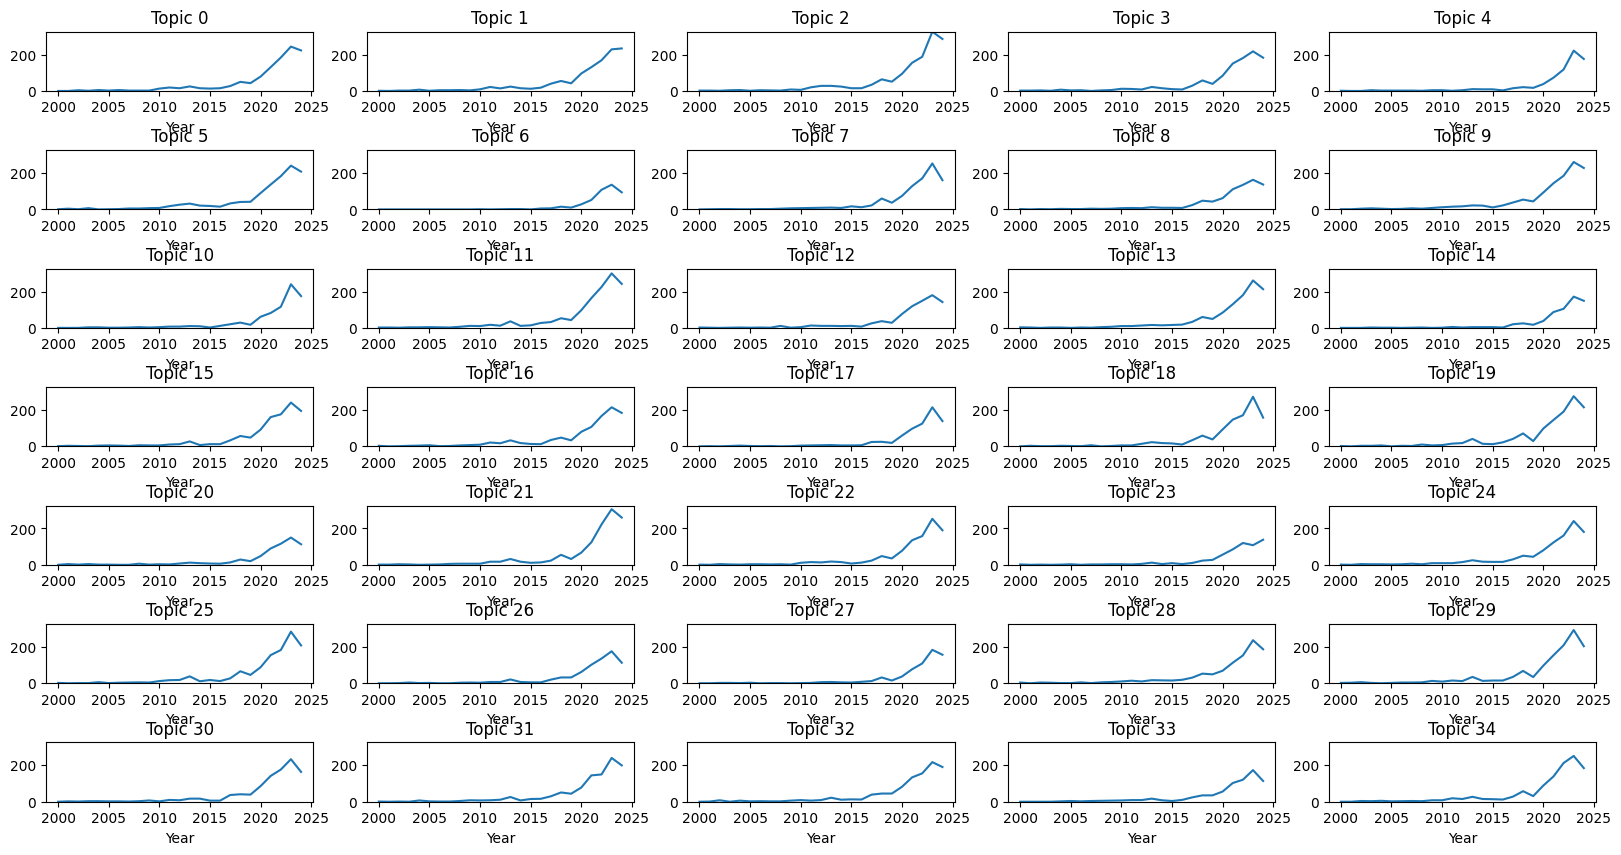

In [9]:
plot_topics_trends(data, kmeans_model.labels_)